# 密度比直接推定のアルゴリズム
<a name="密度比直接推定のアルゴリズム"></a>

** ノンパラメトリックな密度比直接推定を使う**    
頻度分布の確率密度関数の比を直接推定する利点は、   
比べたい分布の確率密度関数をそれぞれ求めて比を取ることより推定誤差を小さくできる。   
統計的にみたデータの入出力関係が   
そこで、密度比の推定に非制約最小二乗密度比推定法を使用する。  

密度比$r({\bf x}) = p({\bf x})/q({\bf x})$の直接推定の方法は、まず密度比を表す基本モデルとして、基底関数の線形モデル   

\begin{eqnarray}
    {\bf \hat{r}}_\alpha = {\displaystyle \Sigma_{i=1}^{N_{kernel}}}{\alpha_i\psi_i({\bf x})} = {\bf \alpha}^{tr}{\bf \psi({\bf x})}
\end{eqnarray}   

を仮定する。   
${\bf \psi({\bf x})}$は、非負の値を取る基底関数。  良く用いられる基底関数として、RBFカーネルを使用する。   
$p({\bf x})$,$q({\bf x})$は、比較する確率密度関数。   
${\bf x}$は、特徴量の値。   
${\bf \alpha}$は、線形モデルのパラメタ。   
$N_{kernel}$は、基底関数の数。   

$\hat{r}({\bf x})q({\bf x})$は$p({\bf x})$に対応していないといけないため、最小化問題は$\hat{r}({\bf x})q({\bf x})$と$p({\bf x})$との関数を一致させる問題となる。   

次に、パラメタ${\bf \alpha}$を求める最適化のアルゴリズムを選択する。    
アルゴリズムは、非制約最小二乗密度比推定法を使用する。
>メモ   
>良く知られる手法として、非負の関数同士の情報理論的な距離を測る一般化カルバックライブラ距離の最小化法がある。    
>しかし、凸最適化問題であり、勾配法によって最適解を求めるため遅い。    

非制約最小二乗密度比推定法は、モデルのパラメタ${\bf \alpha}$を、二乗誤差$E({\bf \alpha})$を最小にするように学習する。   

\begin{eqnarray}
    E(\alpha) &=& \frac{1}{2}\int d{\bf x}\, \left\{\hat{r}_\alpha({\bf x}) - r({\bf x}) \right\}^2 q(\bf x) \\
              &=& \frac{1}{2}\int d{\bf x}\, {\bf \alpha}^{tr}{\bf \psi({\bf x})} {\bf \psi^{tr}({\bf x})}{\bf \alpha}q({\bf x}) -  \int d{\bf x}\,{\bf \alpha}^{tr}{\bf \psi({\bf x})} p({\bf x}) + Const \label{eq:uLSIF}
\end{eqnarray}   
式\ref{eq:uLSIF}の期待値を標本平均に置換える。また、オーバーフィッティングを避けるために$L_2$正則化項を付け加えると、次の最適化問題になる。   

\begin{eqnarray}   
    \displaystyle \min_{\alpha} \left[ \frac{1}{2}{\bf \alpha}^{tr}\hat{H} {\bf \alpha} - {\bf \alpha}^{tr}\hat{h} + \frac{\lambda}{2}|{\bf \alpha}|^2 \right]
\end{eqnarray}   
但し、

\begin{eqnarray}   
    \hat{H} = \frac{1}{N_{q}} \Sigma_{n=1}^{N_{q}}{\bf \psi(\bf x'_{n})}{\bf \psi^{tr}(\bf x'_{n})} \,\, , \,\, \hat{h} = \frac{1}{N_p} \Sigma_{n=1}^{N_p} \psi(\bf x_{n})
\end{eqnarray}   

$p(\bf x)$に従うデータを$\bf x$とし、そのサンプル数を$N_p$、$q(\bf x)$に従うデータを$\bf x'$とし、そのサンプル数を$N_q$とした。   

$E(\bf \alpha)$の微分を0とすると、解析的に解が求められる。   

\begin{eqnarray}
    \alpha = (\hat{H} + \lambda I)^{-1}\hat{h}
\end{eqnarray}
$\alpha < 0$ならば、強制的に$\alpha=0$とする。

RBFのバンド幅$\sigma$は、非制約最小二乗密度比推定法のもとで一個抜き交差確認(LOOCV)を行うことで設定される。   
LOOCVも解析的に求まる。   

\begin{eqnarray}
    LOOCV = \frac{1}{n_t}\Sigma_{i=1}^{n_t}\left[ \frac{1}{2}(\hat{r^{(i)}}({\bf x'_i}))^2 - \hat{r^{(i)}}(\bf x_i) \right]
\end{eqnarray}

具体的なアルゴリズムは、[[1](http://www.ms.k.u-tokyo.ac.jp/2011/LSOD.pdf)]を参考した。   
[1] S Hido et al., Statistical Outlier Detection Using Direct Density Ratio Estimation, Knowledge and Information Systems. vol.26, no.2, pp.309-336, 2011.

## 参考文献

外れ値検出   
サンプルxが外れ値の場合には確率密度比p(x)/q(x)が小さくなることを利用して外れ値を検出 (p(x):外れ値を含まないデータの確率密度関数、q(x): 外れ値を含んだデータの確率密度関数)。   
Smola+, Relative Novelty Detection, AISTATS 2009, pp.536-543.     

変化点検出   
確率密度比推定を用いて推定したカルバックライブラー情報量等(KL(p_t(x)||q_t(x)))の指標を用いて変化点を検出 (p_t(x): 時間tの直前のデータの確率密度関数、q_t(x): 時間tの直後のデータの確率密度関数)。   
変化点でない場合にはp_t(x)とq_t(x)が同じとなり、KL(p_t(x)||q_t(x)) = 0となる。一方で変化点の場合には、KL(p_t(x)||q_t(x)) > 0となる。   

Kawahara+, Change-point detection based on direct density-ratio estimation, Statistical Analysis and Data Mining, Vol.5, No.2, pp.114-127.    
Song+, Change-Point Detection in Time-Series Data by Relative Density-Ratio Estimation, arXiv:1203.0453v1.    

# テスト

In [8]:
import sys
sys.path.append('src/')
import numpy as np
import random as rand
import scipy.stats as scipy_stats
import Direct_density_ratio_estimation_uLSIF_python as density
import matplotlib.pyplot as plt
%matplotlib inline

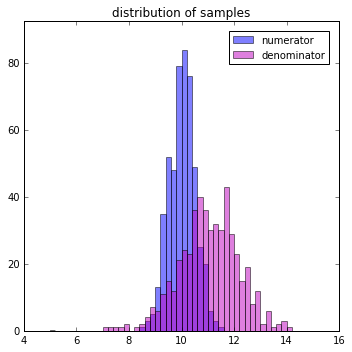

In [36]:
#
N_nume = 500
N_deno = 500
m = [10.,11.]
s = [0.5,1.2]
x_nume = np.random.normal(loc= m[0], scale = s[0], size = N_nume)
y_deno = np.random.normal(loc= m[1], scale = s[1], size = N_deno)
Tot = np.r_[x_nume,y_deno]

# 表示
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.set_title('distribution of samples')
edges = np.arange(5,15,0.2)
a = ax.hist(x_nume, bins = edges, color='b', alpha = 0.5, label='numerator')
b = ax.hist(y_deno, bins = edges, color='m', alpha = 0.5, label='denominator')
ylim = 1.1*np.max([a[0],b[0]])
ax.set_ylim(0,ylim)
ax.legend(fontsize = 10, bbox_to_anchor = (1,1), loc='upper right', borderaxespad = 1)
fig.show()
plt.tight_layout()


In [37]:
dens = density.Density_ratio_estimation(x_nume,y_deno)
dens.run()

start calculate density ratio using uLSIF.
search sigma and lambda
sigma = 0.0010, lambda = 0.0010, score = 0.0002
sigma = 0.0010, lambda = 0.0032, score = 0.0000
sigma = 0.0010, lambda = 0.0100, score = 0.0000
sigma = 0.0010, lambda = 0.0316, score = 0.0000
sigma = 0.0010, lambda = 0.1000, score = 0.0000
sigma = 0.0010, lambda = 0.3162, score = 0.0000
sigma = 0.0010, lambda = 1.0000, score = 0.0000
sigma = 0.0010, lambda = 3.1623, score = -0.0000
sigma = 0.0032, lambda = 0.0010, score = -0.0005
sigma = 0.0032, lambda = 0.0032, score = -0.0008
sigma = 0.0100, lambda = 0.0010, score = -0.0556
sigma = 0.0316, lambda = 0.0010, score = -0.5570
sigma = 0.1000, lambda = 0.0032, score = -1.0473
sigma = 0.1000, lambda = 0.0100, score = -1.1932
sigma = 0.3162, lambda = 0.0316, score = -1.2818
sigma = 0.3162, lambda = 0.1000, score = -1.3390
optimal sigma = 0.3162, lamda = 0.1000
alpha optimization
alpha optimization end
start calculate density ratio using uLSIF.


真の密度比と直接推定密度比のプロット

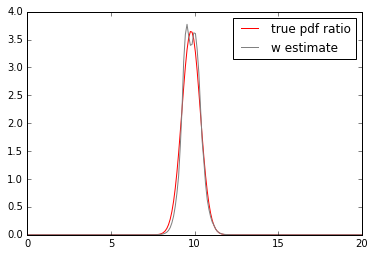

In [38]:
x = np.linspace(0,20,200)
y1 = scipy_stats.norm.pdf(x,loc=m[0],scale=s[0])
y2 = scipy_stats.norm.pdf(x,loc=m[1],scale=s[1])
y3 = (y1/y2)
w_hat = dens.calculate_density_ratio(x)
plt.figure()
plt.plot(x,y3,'r',label='true pdf ratio')
plt.plot(x,w_hat,'gray',label='w estimate')
plt.xlim(0,20)
plt.legend()

もちろん、サンプルサイズを増やしたら精度は上がる

In [39]:
N_nume = 5000
N_deno = 5000
m = [10.,11.]
s = [0.5,1.2]
x_nume = np.random.normal(loc= m[0], scale = s[0], size = N_nume)
y_deno = np.random.normal(loc= m[1], scale = s[1], size = N_deno)

dens = density.Density_ratio_estimation(x_nume,y_deno)
dens.run()

start calculate density ratio using uLSIF.
search sigma and lambda
sigma = 0.0010, lambda = 0.0010, score = -0.0001
sigma = 0.0032, lambda = 0.0010, score = -0.0010
sigma = 0.0100, lambda = 0.0010, score = -0.0127
sigma = 0.0316, lambda = 0.0010, score = -0.3437
sigma = 0.1000, lambda = 0.0010, score = -1.2267
sigma = 0.3162, lambda = 0.0032, score = -1.2642
sigma = 0.3162, lambda = 0.0100, score = -1.3285
sigma = 0.3162, lambda = 0.0316, score = -1.3290
optimal sigma = 0.3162, lamda = 0.0316
alpha optimization
alpha optimization end
start calculate density ratio using uLSIF.


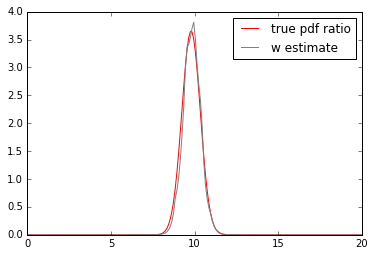

In [40]:
x = np.linspace(0,20,200)
y1 = scipy_stats.norm.pdf(x,loc=m[0],scale=s[0])
y2 = scipy_stats.norm.pdf(x,loc=m[1],scale=s[1])
y3 = (y1/y2)
w_hat = dens.calculate_density_ratio(x)
plt.figure()
plt.plot(x,y3,'r',label='true pdf ratio')
plt.plot(x,w_hat,'gray',label='w estimate')
plt.xlim(0,20)
plt.legend()